# Apporoach 1 (Classical ML)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [18]:
train=pd.read_csv("/content/Train_Data.csv")
test=pd.read_csv("/content/Test_Data.csv")

In [19]:
train

,tweet,label
0,start your day w your daily here,3
1,even a perfect life doesn’t feel perfect in so...,3
2,great ready for next week s q amp a with white...,3
3,5 ways to protect your mental health during th...,3
4,i m officially an occupational therapist passe...,3
...,...,...
2345,discussion tonight tune in fb live,3
2346,as current events are showing change can be su...,3
2347,beyond grateful to join in an open and honest ...,3
2348,to some degree we are all feeling if you are f...,3


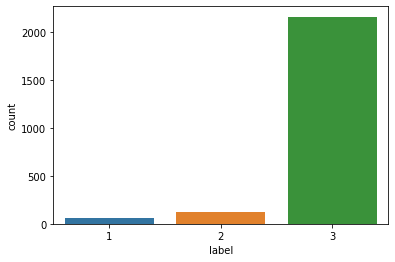

In [20]:
sns.countplot(train.label) #So from the countplot we can clearly see that this is a Imbalanced Dataset.

In [21]:
train.label.value_counts()

3    2165
2     124
1      61
Name: label, dtype: int64

In [22]:
#Filling a missing value (only 1 row(tweet) was missing value)

train=train.fillna("Dummy string")

In [23]:
train

,tweet,label
0,start your day w your daily here,3
1,even a perfect life doesn’t feel perfect in so...,3
2,great ready for next week s q amp a with white...,3
3,5 ways to protect your mental health during th...,3
4,i m officially an occupational therapist passe...,3
...,...,...
2345,discussion tonight tune in fb live,3
2346,as current events are showing change can be su...,3
2347,beyond grateful to join in an open and honest ...,3
2348,to some degree we are all feeling if you are f...,3


## Preprocessing

In [24]:
from bs4 import BeautifulSoup
import re
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize,word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
# removing all emojies with the help of their unicode

import re
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)



In [26]:
#Applying on data frame
train.tweet=train.tweet.apply(remove_emoji)

In [27]:

#remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])  

In [28]:
# Some more text preprocessing

def preprocessing(text):
  x = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
  x = re.sub("\S*@\S*\s?", ' ', x)
  x = re.sub('[%s]' % re.escape(string.punctuation), ' ' , x)
  x = remove_stopwords(x)
  # x = re.sub(r'[0-9]', ' ', x)
  x = re.sub(r"\b[a-zA-Z]\b", "", x)
  x = re.sub(r' +', ' ', x)
  x=x.lower()
  tokens = x.split()
  preprocessed_text = ' '.join(tokens)
  return preprocessed_text


In [29]:
train.tweet=train.tweet.apply(preprocessing)

## Model Building 

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from xgboost.sklearn import XGBClassifier
import warnings

In [31]:
x_train,x_test,y_train,y_test=train_test_split(train.tweet.values,train.label.values,test_size=0.3,shuffle=True,stratify=train.label)

In [32]:
x_train.shape

(1645,)

## USing class weights 

In [ ]:
# Basically class weights are the weights assign to each class later which are added in a loss function and penalizes the model

In [35]:
from sklearn.utils import class_weight
wts=class_weight.compute_class_weight("balanced",np.unique(y_train),train.label)
weights={classs:wt  for classs,wt in zip(np.unique(y_train),wts)}

In [36]:
weights

{1: 12.841530054644808, 2: 6.317204301075269, 3: 0.36181678214010776}

### Vectorizer + Model

In [38]:
from sklearn.pipeline import  Pipeline
clf=Pipeline([
    ('Vectorizer',TfidfVectorizer()),
    ('XGB',XGBClassifier(class_weight=weights,n_estimators=100))]
)

In [39]:
clf.fit(x_train, y_train)
clf.score(x_test,y_test)

0.9191489361702128

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,clf.predict(x_test)))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        18
           2       0.00      0.00      0.00        37
           3       0.92      1.00      0.96       650

    accuracy                           0.92       705
   macro avg       0.31      0.33      0.32       705
weighted avg       0.85      0.92      0.88       705



In [ ]:
''' 
    From the above classification matrix you can see that
    f1 score for class 1 and class 2 is 0, which is not good.
    This means that only class 3 is contributing for the 92% accuracy
    that we got with xgb.
'''

In [ ]:
'''
     XGBClassifier      vaildation acc= 92   L.B= 88.30

Also tried randomforest , decisiontree, logisticregression but still no improvemnt in the overall accuracy

'''

In [ ]:
test.tweet=test.tweet.apply(remove_emoji)

preds=clf.predict(test.tweet)

# preds

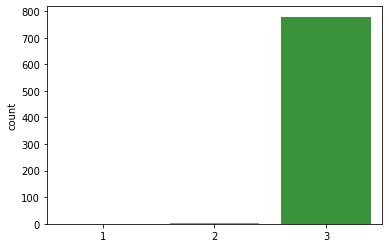

In [42]:
sns.countplot(preds)

In [45]:
sub=pd.DataFrame({"label":preds})
sub.to_csv("sub.csv",index=False)
sub.head()

,label
0,3
1,3
2,3
3,3
4,3


In [ ]:
'''
  I also did the finetuning with randomizedsearchcv, tried different models but still the accuracy wasnt imporving on LB
  So took a step ahead with ber embeddings
'''

# Apporach 2 (Using Pretrained Distilbert embeddings with Logistics Model)

In [46]:
'''
    In this apporach i just used distilbert pretrained embedding for tweets and then feeded those into the logistics regression.
    You can also use bert if have enough computing power
'''

'\n    In this apporach i just used distilbert pretrained embedding for tweets and then feeded those into the logistics regression.\n    You can also use bert if have enough computing power\n'

In [47]:
!pip install transformers

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import torch
import transformers as ppb
import warnings


warnings.filterwarnings('ignore')

     |████████████████████████████████| 2.6 MB 6.7 MB/s 
     |████████████████████████████████| 895 kB 55.2 MB/s 
     |████████████████████████████████| 3.3 MB 47.2 MB/s 
     |████████████████████████████████| 636 kB 75.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [48]:
# As distilbert already have embeddings for emojis, so i havent removed or preprocessed the tweets

In [49]:
df = pd.read_csv('/content/Train_Data.csv')

test=pd.read_csv('/content/Test_Data.csv')

In [50]:
df=df.fillna("This is dummy text")

test=test.fillna("This is dummy text")

In [51]:
df.columns=[0,1]
test.columns=[0]

In [52]:
batch_1 = df

batch_1[1].value_counts()

3    2165
2     124
1      61
Name: 1, dtype: int64

In [53]:
'''
  Downloading the Tokenizer and the model
'''
# For DistilBERT:
model_class=ppb.DistilBertModel
tokenizer_class=ppb.DistilBertTokenizer
pretrained_weights = 'distilbert-base-uncased'


# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/442 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [54]:
# Tokenizing means mapping words to their index (number) poisitions in the vocabulury

tokenized = batch_1[0].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

test_tokenized = test[0].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [55]:
tokenized[0]

[101, 2707, 2115, 2154, 1059, 2115, 3679, 2182, 102]

In [56]:
# Padding 

max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [57]:
padded[0]

array([ 101, 2707, 2115, 2154, 1059, 2115, 3679, 2182,  102,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0])

In [58]:
# generating attention masks

attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(2350, 67)

In [59]:
attention_mask[0]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [60]:
max_len = 0
for i in test_tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

test_padded = np.array([i + [0]*(max_len-len(i)) for i in test_tokenized.values])

In [61]:
test_attention_mask = np.where(test_padded != 0, 1, 0)
test_attention_mask.shape

(784, 65)

In [62]:
# Generating ber embeddings

In [63]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [64]:
features = last_hidden_states[0][:,0,:].numpy()

In [65]:
labels = batch_1[1]

In [66]:
input_ids = torch.tensor(test_padded)  
attention_mask = torch.tensor(test_attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [67]:
test_featuress = last_hidden_states[0][:,0,:].numpy()

In [68]:
last_hidden_states[0].shape

torch.Size([784, 65, 768])

In [93]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [94]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
import warnings

In [95]:
from sklearn.utils import class_weight
wts=class_weight.compute_class_weight("balanced",np.unique(train_labels),df[1])
weights={classs:wt  for classs,wt in zip(np.unique(train_labels),wts)}

In [102]:
lr_clf = LogisticRegression()
#class_weight=weights
lr_clf.fit(train_features, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
lr_clf.score(test_features, test_labels)

0.9115646258503401

In [104]:
from sklearn.metrics import classification_report
print(classification_report(test_labels,lr_clf.predict(list(test_features))))

              precision    recall  f1-score   support

           1       0.25      0.13      0.17        15
           2       0.30      0.09      0.14        32
           3       0.93      0.98      0.96       541

    accuracy                           0.91       588
   macro avg       0.49      0.40      0.42       588
weighted avg       0.88      0.91      0.89       588



In [99]:
'''
Got better f1 score for class1 and class2 than the model of apporach 1.
'''

'\nGot better f1 score for class1 and class2 than the model of apporach 1.\n'

In [100]:
preds=lr_clf.predict(test_featuress)

In [101]:
sub=pd.DataFrame({"label":preds})
sub.to_csv("sub.csv",index=False)
sub

,label
0,3
1,3
2,3
3,3
4,3
...,...
779,2
780,3
781,3
782,3
